In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, StandardScaler, VectorAssembler


sc = SparkContext("local[3]", "test")
spark = SparkSession(sc)

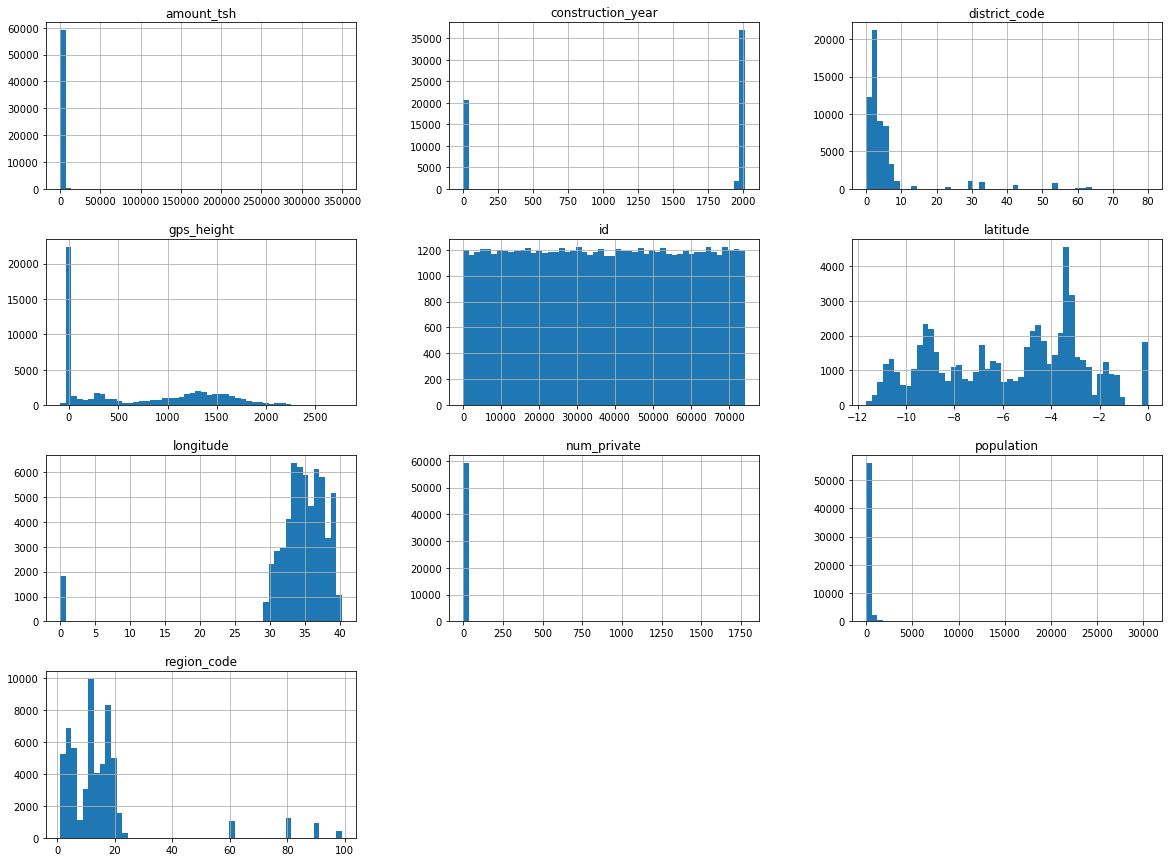

In [15]:
import spark_functions

df = spark_functions.load_data(spark)
df_train, df_test = spark_functions.train_test_split(df)

#pdf_train = df_train.toPandas()

df_train.groupBy('extraction_type').count().collect()

%matplotlib inline
import matplotlib.pyplot as plt

df.toPandas().hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
df_train.groupBy('recorded_by').count().collect()

[Row(recorded_by='GeoData Consultants Ltd', count=47556)]

In [9]:
df_train.groupBy('public_meeting').count().collect()

[Row(public_meeting=None, count=2709),
 Row(public_meeting=True, count=40826),
 Row(public_meeting=False, count=4021)]

In [17]:


df_train.groupBy('payment').count().collect()

[Row(payment='unknown', count=6511),
 Row(payment='pay annually', count=2897),
 Row(payment='other', count=858),
 Row(payment='pay per bucket', count=7164),
 Row(payment='never pay', count=20385),
 Row(payment='pay when scheme fails', count=3143),
 Row(payment='pay monthly', count=6598)]

In [19]:
df_train.groupBy('payment_type').count().collect()

[Row(payment_type='unknown', count=6511),
 Row(payment_type='monthly', count=6598),
 Row(payment_type='per bucket', count=7164),
 Row(payment_type='other', count=858),
 Row(payment_type='annually', count=2897),
 Row(payment_type='on failure', count=3143),
 Row(payment_type='never pay', count=20385)]